# Pythonカーネル内でRを呼び出して使うマジック（黒魔術!?）

Pythonでの書き方がすぐわからない時に、Rの関数や書き方を呼び出して使うマジックを紹介します。

まず、rpy2というPythonのパッケージが入っていない場合、インストールします。
Jupyterからターミナル（コンソール）を開いて、
pip install rpy2
と打って実行するとパッケージがインストールされます。
（注：Docker環境内でPythonのパッケージをインストールする方法として、pipやcondaがあるようですが、どちらのコマンドで追加するのがベターなのかよくわかっておりません。）

そしてRを呼び出す前に、次の１行のおまじない（召喚魔法）を宣言することが重要です。これでRをPythonカーネル内で使えるようになります。ちなみに、今開いているノートがどのカーネルで実行されるかは、ノートの右上に表示されており、ここのメニューから選択すれば別のカーネルにも変更可能です。

In [3]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


ちなみに余談ですが、100本ノックのPython版の最初では %load_ext sql という行がありましたが、これはSQLを呼び出すおまじないでした。

次に、Rの使い方ですが、１行ごとにRのコードを書く場合は、行頭に %R のマジックコマンドをつけます。

In [7]:
%R library(tidyverse)
%R diamonds %>% head(n = 10)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


また、セル単位でRを使う場合は、%%R をセルの最初に宣言すると、そのセル内はRのコードとして認識されます。

In [6]:
%%R
diamonds %>%
    group_by(cut) %>%
    summarise(average_carat = mean(carat))

R[write to console]: `summarise()` ungrouping output (override with `.groups` argument)



# A tibble: 5 x 2
  cut       average_carat
  <ord>             <dbl>
1 Fair              1.05 
2 Good              0.849
3 Very Good         0.806
4 Premium           0.892
5 Ideal             0.703


Rの関数が使えるので、ggplot2で可視化もできます。余談ですが最近は、Pythonへのggplot2の移植版として、plotnineパッケージというものもあるそうなので、Rを呼び出したくない場合はそちらを使うこともできます。

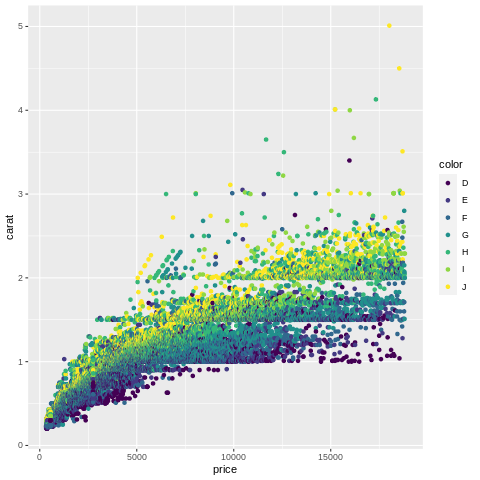

In [8]:
%%R
diamonds %>%
    ggplot() +
    geom_point(aes(x = price, y = carat, colour = color))

応用編として、RとPythonの間でデータのやり取りをすることもできます。これによって、１つのノート内でPythonとRの混成を実現したことのメリットがやっと現れます。

%R -o をRの変数（オブジェクト）名の前につけると、Pythonに変換できます。（出力/outのイニシャルをとったオプション -o だと思われます。）

In [35]:
%R -o diamonds
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [16]:
type(diamonds)

pandas.core.frame.DataFrame

Pandasのデータフレームになっていることが確認できます。

In [47]:
df_mean = diamonds.groupby('color').mean()
display(df_mean)

,carat,depth,table,price,x,y,z
color,,,,,,,
D,0.657795,61.698125,57.404590,3169.954096,5.417051,5.421128,3.342827
E,0.657867,61.662090,57.491201,3076.752475,5.411580,5.419029,3.340689
F,0.736538,61.694582,57.433536,3724.886397,5.614961,5.619456,3.464446
G,0.771190,61.757111,57.288629,3999.135671,5.677543,5.680192,3.505021
H,0.911799,61.836850,57.517811,4486.669196,5.983335,5.984815,3.695965
I,1.026927,61.846385,57.577278,5091.874954,6.222826,6.222730,3.845411
J,1.162137,61.887215,57.812393,5323.818020,6.519338,6.518105,4.033251


反対にPythonからRに変換するときは、 %R -i オプションをつけます。（入力/inputの -i オプションではないでしょうか。）

In [49]:
%R -i df_mean
%R df_mean %>% head()

,carat,depth,table,price,x,y,z
D,0.657795,61.698125,57.404590,3169.954096,5.417051,5.421128,3.342827
E,0.657867,61.662090,57.491201,3076.752475,5.411580,5.419029,3.340689
F,0.736538,61.694582,57.433536,3724.886397,5.614961,5.619456,3.464446
G,0.771190,61.757111,57.288629,3999.135671,5.677543,5.680192,3.505021
H,0.911799,61.836850,57.517811,4486.669196,5.983335,5.984815,3.695965
I,1.026927,61.846385,57.577278,5091.874954,6.222826,6.222730,3.845411


Pythonで計算した集約結果が、確かにRのオブジェクトに変換されています。念の為、Rだけで同じ計算をしたものと比較してみます。

In [46]:
%%R
diamonds %>% 
    group_by(color) %>%
    summarise(across(where(is.numeric), mean)) %>%
    head()

R[write to console]: `summarise()` ungrouping output (override with `.groups` argument)



# A tibble: 6 x 8
  color carat depth table price     x     y     z
  <ord> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
1 D     0.658  61.7  57.4 3170.  5.42  5.42  3.34
2 E     0.658  61.7  57.5 3077.  5.41  5.42  3.34
3 F     0.737  61.7  57.4 3725.  5.61  5.62  3.46
4 G     0.771  61.8  57.3 3999.  5.68  5.68  3.51
5 H     0.912  61.8  57.5 4487.  5.98  5.98  3.70
6 I     1.03   61.8  57.6 5092.  6.22  6.22  3.85


表示桁数が整えらていることを除けば、Pythonの結果とRの結果は一致しています。PythonkからRを呼び出して、データの受け渡しがマジックコマンドで実現できました。めでたしめでたし。おしまい。

# 後日譚

RとPythonなど複数の言語を１つのノート内で混在させて使う方法はいくつかあるようです。<https://stackoverflow.com/questions/39008069/r-and-python-in-one-jupyter-notebook>

1. rpy2によってrmagickを実現（本ノートで実践した方法）
2. Beaker notebookを使う <https://github.com/twosigma/beakerx>
3. SoS kernelをインストールして使う <https://vatlab.github.io/sos-docs/>

時と場合や用途によって、使い分ければ、さらに面白い使い方があるかもしれません。

# 逆にR内からPythonを呼び出すには

reticulateパッケージ <https://qiita.com/yamano357/items/9319d4b073d82a261ed8> などがあります。でも、それはまた別のお話。